# 데이터 EDA

In [12]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (matplotlib)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (12, 6)

# 데이터 경로 설정
import os
data_dir = '../data/'
crsp_daily_path = os.path.join(data_dir, 'crsp_daily.csv')
crsp_monthly_path = os.path.join(data_dir, 'crsp_monthly.csv')
ff_factors_path = os.path.join(data_dir, 'F-F_Research_Data_Factors.csv')
vix_path = os.path.join(data_dir, 'vix_index.csv')

## 1. CRSP Daily 데이터 EDA

In [13]:
# CRSP Daily 데이터 로드
crsp_daily = pd.read_csv(crsp_daily_path)

print("=== CRSP Daily 데이터 기본 정보 ===")
print(f"데이터 크기: {crsp_daily.shape}")
print(f"컬럼 수: {crsp_daily.shape[1]}")
print(f"행 수: {crsp_daily.shape[0]}")

print("\n=== 데이터 타입 ===")
print(crsp_daily.dtypes)

print("\n=== 첫 5행 ===")
print(crsp_daily.head())

print("\n=== 결측값 확인 ===")
missing_values = crsp_daily.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(f"결측값이 있는 컬럼 수: {len(missing_values)}")
if len(missing_values) > 0:
    print(missing_values.head(10))

=== CRSP Daily 데이터 기본 정보 ===
데이터 크기: (165919, 63)
컬럼 수: 63
행 수: 165919

=== 데이터 타입 ===
PERMNO        int64
date          int64
NAMEENDT    float64
SHRCD         int64
EXCHCD        int64
             ...   
vwretd      float64
vwretx      float64
ewretd      float64
ewretx      float64
sprtrn      float64
Length: 63, dtype: object

=== 첫 5행 ===
   PERMNO      date    NAMEENDT  SHRCD  EXCHCD  SICCD    NCUSIP TICKER  \
0   13027  20111020  20170801.0     73       4   6726  46429B69   USMV   
1   13027  20111021         NaN     73       4   6726  46429B69   USMV   
2   13027  20111024         NaN     73       4   6726  46429B69   USMV   
3   13027  20111025         NaN     73       4   6726  46429B69   USMV   
4   13027  20111026         NaN     73       4   6726  46429B69   USMV   

          COMNAM  SHRCLS  ... CFACPR  CFACSHR OPENPRC NUMTRD       RETX  \
0  ISHARES TRUST     NaN  ...    1.0      1.0   25.31    NaN          C   
1  ISHARES TRUST     NaN  ...    1.0      1.0   25.67    N

In [14]:
# CRSP Daily 데이터 상세 분석
print("=== 수치형 컬럼 기술통계 ===")
numeric_cols = crsp_daily.select_dtypes(include=[np.number]).columns
print(crsp_daily[numeric_cols].describe())

# 날짜 컬럼 분석
crsp_daily['date'] = pd.to_datetime(crsp_daily['date'], format='%Y%m%d')
print(f"\n=== 날짜 범위 ===")
print(f"시작일: {crsp_daily['date'].min()}")
print(f"종료일: {crsp_daily['date'].max()}")
print(f"총 기간: {(crsp_daily['date'].max() - crsp_daily['date'].min()).days}일")

# 종목 수 분석
print(f"\n=== 종목 정보 ===")
print(f"고유 PERMNO 수: {crsp_daily['PERMNO'].nunique()}")
print(f"고유 티커 수: {crsp_daily['TICKER'].nunique()}")

# 가격 정보 분석
if 'PRC' in crsp_daily.columns:
    crsp_daily['PRC_abs'] = crsp_daily['PRC'].abs()  # 음수 가격은 절댓값으로 변환
    print(f"\n=== 가격(PRC) 정보 ===")
    print(f"평균 가격: ${crsp_daily['PRC_abs'].mean():.2f}")
    print(f"중간 가격: ${crsp_daily['PRC_abs'].median():.2f}")
    print(f"최고 가격: ${crsp_daily['PRC_abs'].max():.2f}")
    print(f"최저 가격: ${crsp_daily['PRC_abs'].min():.2f}")

# 수익률 정보 분석
if 'RET' in crsp_daily.columns:
    # 수익률에서 문자열 제거 (예: 'C', 'B' 등)
    ret_numeric = pd.to_numeric(crsp_daily['RET'], errors='coerce')
    print(f"\n=== 수익률(RET) 정보 ===")
    print(f"평균 수익률: {ret_numeric.mean():.6f}")
    print(f"수익률 표준편차: {ret_numeric.std():.6f}")
    print(f"최대 수익률: {ret_numeric.max():.6f}")
    print(f"최소 수익률: {ret_numeric.min():.6f}")

=== 수치형 컬럼 기술통계 ===
              PERMNO          date      NAMEENDT     SHRCD         EXCHCD  \
count  165919.000000  1.659190e+05  2.200000e+02  165919.0  165919.000000   
mean    81596.642283  2.012974e+07  2.013694e+07      73.0       3.434598   
std     20843.333696  7.230790e+04  7.408378e+04       0.0       0.953777   
min     13027.000000  1.993013e+07  1.997010e+07      73.0       1.000000   
25%     85765.000000  2.007112e+07  2.007073e+07      73.0       2.000000   
50%     86457.000000  2.014011e+07  2.016020e+07      73.0       4.000000   
75%     90004.000000  2.019070e+07  2.019113e+07      73.0       4.000000   
max     92187.000000  2.024123e+07  2.024123e+07      73.0       5.000000   

          SICCD  SHRCLS     NAICS         PERMCO         ISSUNO  ...  \
count  165919.0     0.0  144503.0  165919.000000  165919.000000  ...   
mean     6726.0     NaN  525990.0   39196.431439    2195.276924  ...   
std         0.0     NaN       0.0    5759.679488    8096.262406  ...  

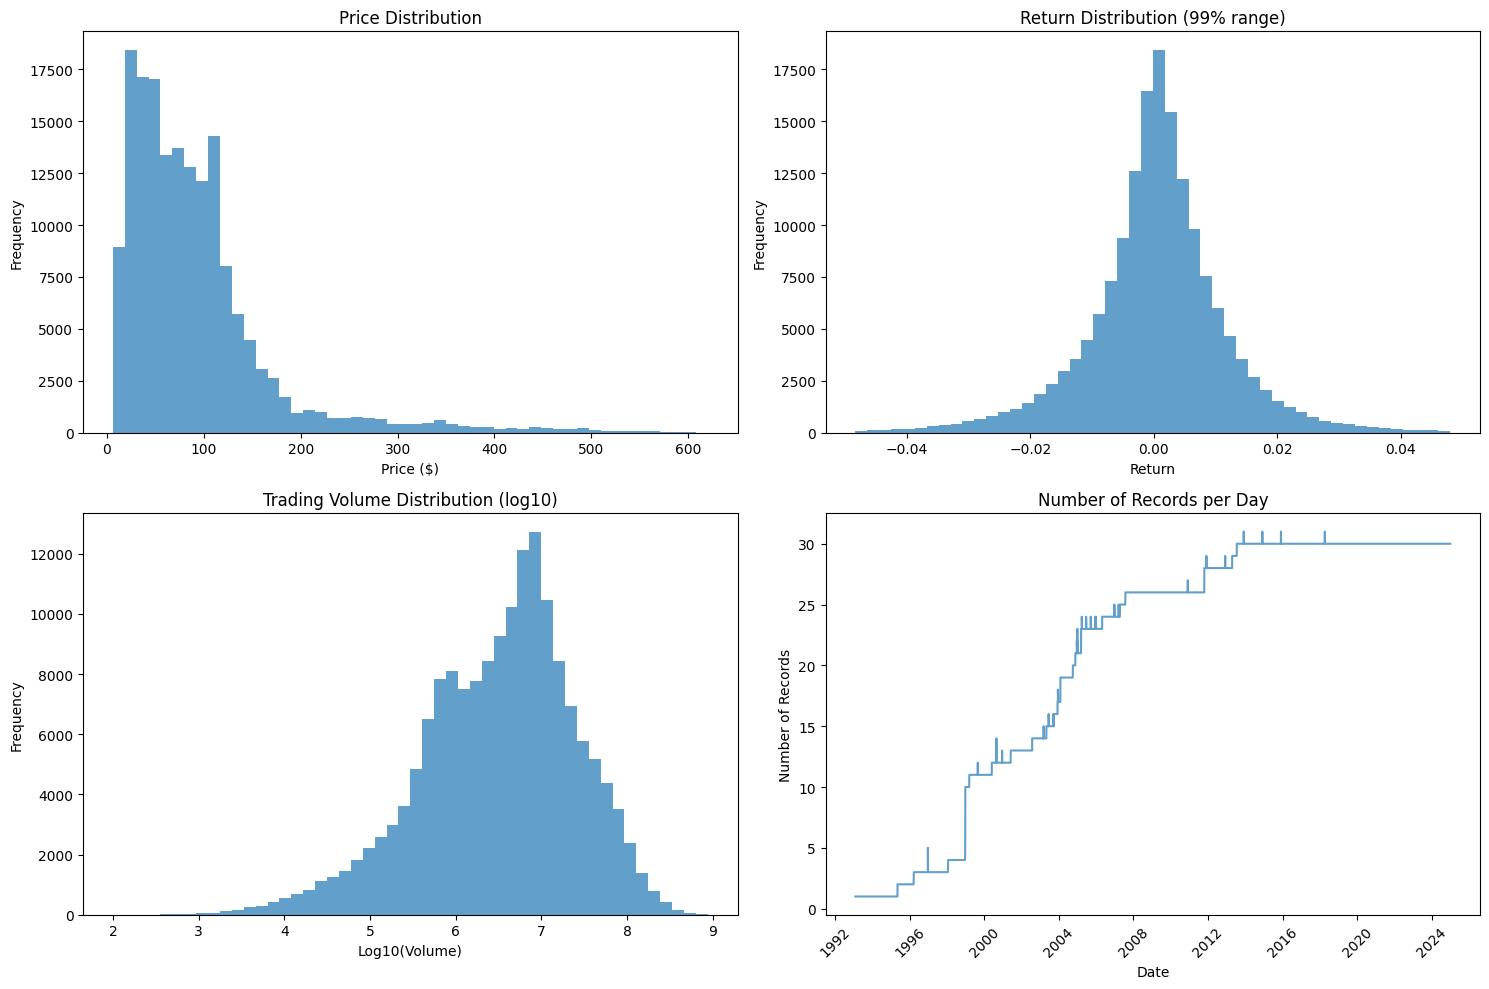

In [15]:
# CRSP Daily 데이터 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. 가격 분포
if 'PRC_abs' in crsp_daily.columns:
    axes[0, 0].hist(crsp_daily['PRC_abs'].dropna(), bins=50, alpha=0.7)
    axes[0, 0].set_title('Price Distribution')
    axes[0, 0].set_xlabel('Price ($)')
    axes[0, 0].set_ylabel('Frequency')

# 2. 수익률 분포
ret_numeric = pd.to_numeric(crsp_daily['RET'], errors='coerce')
if not ret_numeric.empty:
    # 극값 제거 (99% 범위)
    ret_filtered = ret_numeric[(ret_numeric >= ret_numeric.quantile(0.005)) & 
                              (ret_numeric <= ret_numeric.quantile(0.995))]
    axes[0, 1].hist(ret_filtered.dropna(), bins=50, alpha=0.7)
    axes[0, 1].set_title('Return Distribution (99% range)')
    axes[0, 1].set_xlabel('Return')
    axes[0, 1].set_ylabel('Frequency')

# 3. 거래량 분포
if 'VOL' in crsp_daily.columns:
    vol_positive = crsp_daily['VOL'][crsp_daily['VOL'] > 0]
    axes[1, 0].hist(np.log10(vol_positive), bins=50, alpha=0.7)
    axes[1, 0].set_title('Trading Volume Distribution (log10)')
    axes[1, 0].set_xlabel('Log10(Volume)')
    axes[1, 0].set_ylabel('Frequency')

# 4. 시간별 데이터 수
daily_counts = crsp_daily.groupby('date').size()
axes[1, 1].plot(daily_counts.index, daily_counts.values, alpha=0.7)
axes[1, 1].set_title('Number of Records per Day')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Number of Records')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 2. CRSP Monthly 데이터 EDA

In [29]:
# CRSP Monthly 데이터 로드 및 기본 분석
crsp_monthly = pd.read_csv(crsp_monthly_path)

print("=== CRSP Monthly 데이터 기본 정보 ===")
print(f"데이터 크기: {crsp_monthly.shape}")
print(f"컬럼 수: {crsp_monthly.shape[1]}")
print(f"행 수: {crsp_monthly.shape[0]}")

print("\n=== 첫 5행 ===")
print(crsp_monthly.head())

# 날짜 컬럼 변환
crsp_monthly['date'] = pd.to_datetime(crsp_monthly['date'], format='%Y%m%d')
print(f"\n=== 날짜 범위 ===")
print(f"시작일: {crsp_monthly['date'].min()}")
print(f"종료일: {crsp_monthly['date'].max()}")
print(f"총 개월 수: {crsp_monthly['date'].nunique()}")

print(f"\n=== 종목 정보 ===")
print(f"고유 PERMNO 수: {crsp_monthly['PERMNO'].nunique()}")
print(f"고유 티커 수: {crsp_monthly['TICKER'].nunique()}")

# 결측값 확인
print("\n=== 결측값 확인 ===")
missing_values = crsp_monthly.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(f"결측값이 있는 컬럼 수: {len(missing_values)}")
if len(missing_values) > 0:
    print(missing_values.head(10))

=== CRSP Monthly 데이터 기본 정보 ===
데이터 크기: (8049, 64)
컬럼 수: 64
행 수: 8049

=== 첫 5행 ===
   PERMNO      date    NAMEENDT  SHRCD  EXCHCD  SICCD    NCUSIP TICKER  \
0   13027  20111031  20170801.0     73       4   6726  46429B69   USMV   
1   13027  20111130         NaN     73       4   6726  46429B69   USMV   
2   13027  20111230         NaN     73       4   6726  46429B69   USMV   
3   13027  20120131         NaN     73       4   6726  46429B69   USMV   
4   13027  20120229         NaN     73       4   6726  46429B69   USMV   

          COMNAM  SHRCLS  ... CFACSHR  ALTPRC SPREAD  ALTPRCDT      RETX  \
0  ISHARES TRUST     NaN  ...     1.0  25.960    NaN  20111031         C   
1  ISHARES TRUST     NaN  ...     1.0  26.000    NaN  20111130  0.001541   
2  ISHARES TRUST     NaN  ...     1.0  26.720    NaN  20111230  0.027692   
3  ISHARES TRUST     NaN  ...     1.0  27.070    NaN  20120131  0.013099   
4  ISHARES TRUST     NaN  ...     1.0  27.638    NaN  20120229  0.020983   

     vwretd    

In [30]:
crsp_monthly

,PERMNO,date,NAMEENDT,SHRCD,EXCHCD,SICCD,NCUSIP,TICKER,COMNAM,SHRCLS,...,CFACSHR,ALTPRC,SPREAD,ALTPRCDT,RETX,vwretd,vwretx,ewretd,ewretx,sprtrn
0,13027,2011-10-31,20170801.0,73,4,6726,46429B69,USMV,ISHARES TRUST,NaN,...,1.0,25.960,NaN,20111031,C,0.114146,0.112735,0.107697,0.106575,0.107723
1,13027,2011-11-30,NaN,73,4,6726,46429B69,USMV,ISHARES TRUST,NaN,...,1.0,26.000,NaN,20111130,0.001541,-0.006270,-0.008937,-0.020645,-0.022480,-0.005059
2,13027,2011-12-30,NaN,73,4,6726,46429B69,USMV,ISHARES TRUST,NaN,...,1.0,26.720,NaN,20111230,0.027692,0.003676,0.001428,-0.003561,-0.007020,0.008533
3,13027,2012-01-31,NaN,73,4,6726,46429B69,USMV,ISHARES TRUST,NaN,...,1.0,27.070,NaN,20120131,0.013099,0.054106,0.052960,0.085342,0.084432,0.043583
4,13027,2012-02-29,NaN,73,4,6726,46429B69,USMV,ISHARES TRUST,NaN,...,1.0,27.638,NaN,20120229,0.020983,0.041225,0.038953,0.036494,0.035003,0.040589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8044,92187,2024-08-30,NaN,73,4,6726,92194385,VEA,VANGUARD TAX MANAGED FUNDS,NaN,...,1.0,52.390,NaN,20240830,0.029071,0.021572,0.020203,-0.010883,-0.012627,0.022835
8045,92187,2024-09-30,NaN,73,4,6726,92194385,VEA,VANGUARD TAX MANAGED FUNDS,NaN,...,1.0,52.810,NaN,20240930,0.008017,0.020969,0.019485,0.016322,0.013885,0.020197
8046,92187,2024-10-31,NaN,73,4,6726,92194385,VEA,VANGUARD TAX MANAGED FUNDS,NaN,...,1.0,50.100,NaN,20241031,-0.051316,-0.008298,-0.009139,-0.005589,-0.006922,-0.009897
8047,92187,2024-11-29,NaN,73,4,6726,92194385,VEA,VANGUARD TAX MANAGED FUNDS,NaN,...,1.0,50.300,NaN,20241129,0.003992,0.064855,0.063463,0.063684,0.061936,0.057301


In [53]:
# 2014-2024 기간 데이터만 추출
crsp_monthly = crsp_monthly[(crsp_monthly['date'] >= '2014-01-01') & (crsp_monthly['date'] <= '2024-12-31')]
print(f"\n=== 2014-2024 기간 데이터 크기 ===")
print(f"데이터 크기: {crsp_monthly.shape}")
print(f"컬럼 수: {crsp_monthly.shape[1]}")
print(f"행 수: {crsp_monthly.shape[0]}")


=== 2014-2024 기간 데이터 크기 ===
데이터 크기: (3825, 64)
컬럼 수: 64
행 수: 3825


In [54]:
# unique PERMNO 리스트
print(crsp_monthly['PERMNO'].unique())
print(len(crsp_monthly['PERMNO'].unique()))

[13027 13033 13851 14020 17746 81659 83225 84398 85765 86451 86452 86454
 86455 86456 86457 86755 88222 89468 89734 89848 89959 90003 90004 90350
 90448 90878 91130 91132 91202 91933 92187]
31


In [55]:
# 데이터 기간 정보
print(f"시작일: {crsp_monthly['date'].min()}")
print(f"종료일: {crsp_monthly['date'].max()}")
print(f"총 기간: {(crsp_monthly['date'].max() - crsp_monthly['date'].min()).days}일")

시작일: 2014-01-31 00:00:00
종료일: 2024-06-28 00:00:00
총 기간: 3801일


In [56]:
crsp_monthly['SHRCD'].value_counts()

SHRCD
73    3825
Name: count, dtype: int64

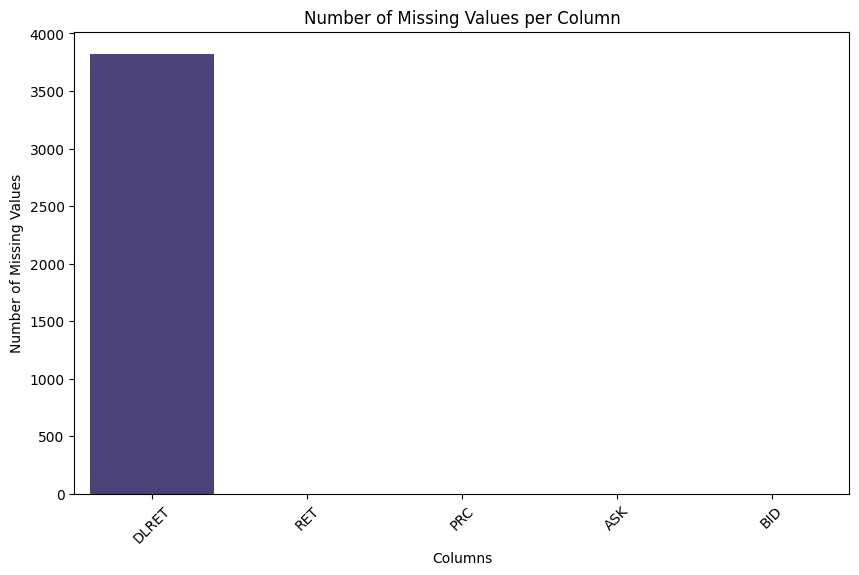

In [58]:
# 사용할 컬럼 리스트
key_cols = ['PERMNO', 'date', 'TICKER', 'RET', 'DLRET', 'PRC', 'SHROUT', 'VOL', 'ASK', 'BID', 'ASKHI', 'BIDLO']

# 컬럼별 결측치 개수 막대 그래프
missing_values = crsp_monthly[key_cols].isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.title('Number of Missing Values per Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()

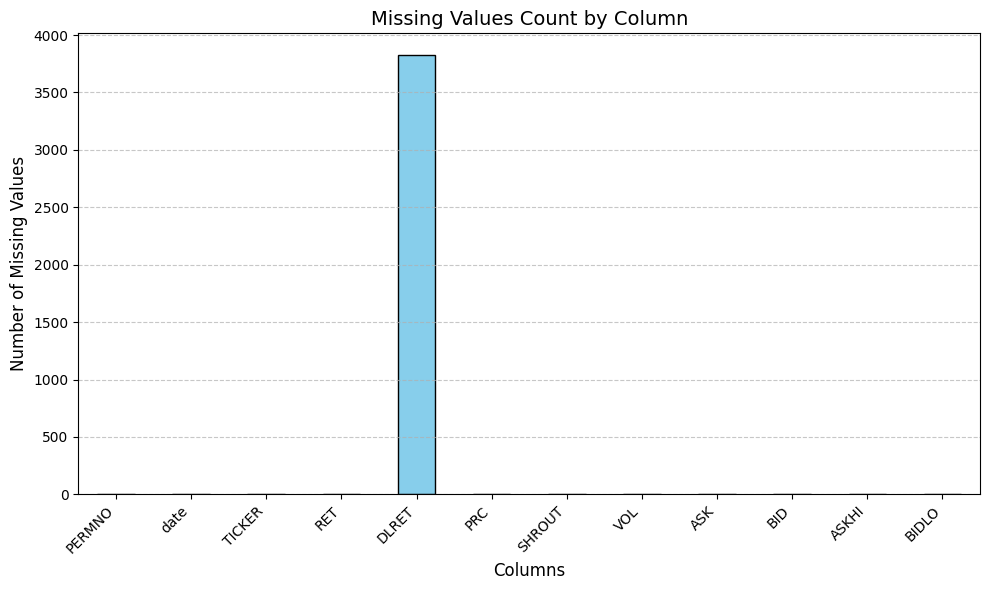

Missing Values Summary:
        Missing Count  Missing Percentage (%)
PERMNO              0                    0.00
date                0                    0.00
TICKER              0                    0.00
RET                 1                    0.03
DLRET            3824                   99.97
PRC                 1                    0.03
SHROUT              0                    0.00
VOL                 0                    0.00
ASK                 1                    0.03
BID                 1                    0.03
ASKHI               0                    0.00
BIDLO               0                    0.00


In [59]:
# 사용할 컬럼 리스트
key_cols = ['PERMNO', 'date', 'TICKER', 'RET', 'DLRET', 'PRC', 'SHROUT', 'VOL', 'ASK', 'BID', 'ASKHI', 'BIDLO']

# 컬럼 선택
df_selected = crsp_monthly[key_cols]

# 결측치 개수 계산
missing_counts = df_selected.isnull().sum()

# 막대그래프 시각화
plt.figure(figsize=(10, 6))
missing_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Missing Values Count by Column', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 결측치 요약 테이블 출력
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage (%)': (missing_counts / len(df_selected) * 100).round(2)
})
print("Missing Values Summary:")
print(missing_summary)

3825
RET Range (All Securities):
min   -0.345576
max    0.331570
Name: RET, dtype: float64

RET Outliers (IQR method, All Securities):
           date  PERMNO TICKER       RET
103  2020-03-31   13027   USMV -0.113379
262  2020-03-31   13033   SCHD -0.119389
263  2020-04-30   13033   SCHD  0.126056
270  2020-11-30   13033   SCHD  0.131688
293  2022-10-31   13033   SCHD  0.112148
...         ...     ...    ...       ...
7776 2020-03-31   91933    HYG -0.099837
7991 2020-03-31   92187    VEA -0.151984
7999 2020-11-30   92187    VEA  0.142966
8021 2022-09-30   92187    VEA -0.098379
8023 2022-11-30   92187    VEA  0.125486

[140 rows x 4 columns]
Lower Bound: -0.0955, Upper Bound: 0.1120


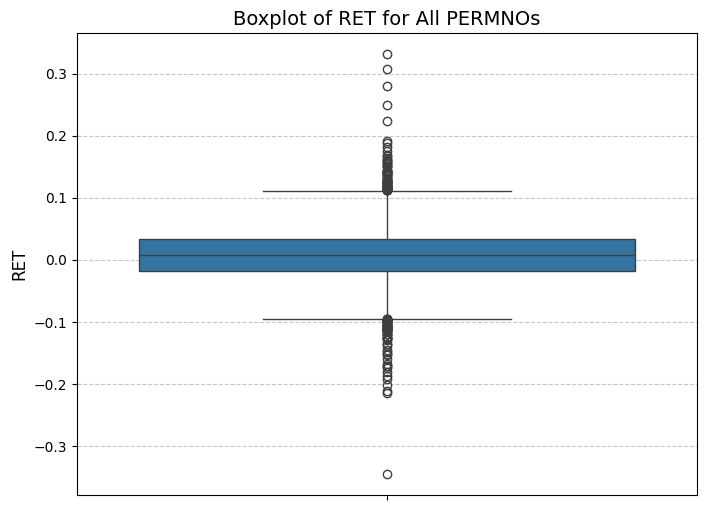

In [61]:
# 사용할 컬럼 선택
key_cols = ['PERMNO', 'date', 'TICKER', 'RET']

# 컬럼 선택 (전체 증권)
df_selected = crsp_monthly[key_cols]
print(len(df_selected))
# RET 범위 확인 (전체 데이터)
df_selected['RET'] = pd.to_numeric(df_selected['RET'], errors='coerce')
ret_range = df_selected['RET'].agg(['min', 'max'])

print("RET Range (All Securities):")
print(ret_range)

# IQR 기반 이상치 확인 함수
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][['date', 'PERMNO', 'TICKER', column]]
    return outliers, lower_bound, upper_bound

# 전체 데이터의 이상치 확인
outliers, lower_bound, upper_bound = find_outliers(df_selected, 'RET')

print("\nRET Outliers (IQR method, All Securities):")
print(outliers)
print(f"Lower Bound: {lower_bound:.4f}, Upper Bound: {upper_bound:.4f}")

# Boxplot 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_selected['RET'])
plt.title('Boxplot of RET for All PERMNOs', fontsize=14)
plt.ylabel('RET', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

## 3. Fama-French Factors 데이터 EDA

In [71]:
# Fama-French Factors 데이터 로드 및 전처리
# 헤더를 건너뛰고 데이터 로드 (첫 3줄은 설명)
ff_factors_raw = pd.read_csv(ff_factors_path, skiprows=3)

print("=== Fama-French Factors 원본 데이터 기본 정보 ===")
print(f"원본 데이터 크기: {ff_factors_raw.shape}")
print("\n=== 컬럼명 ===")
print(ff_factors_raw.columns.tolist())

# 첫 번째 컬럼(날짜)에서 공백이나 특수 문자가 포함된 행 제거 (연간 데이터 구분선 제거)
date_col = ff_factors_raw.columns[0]
# 6자리 숫자(YYYYMM)로만 구성된 행만 선택
ff_factors = ff_factors_raw[ff_factors_raw[date_col].astype(str).str.match(r'^\d{6}$')].copy()

print(f"\n=== 월별 데이터만 필터링 후 크기 ===")
print(f"데이터 크기: {ff_factors.shape}")

print("\n=== 첫 5행 ===")
print(ff_factors.head())

print("\n=== 마지막 5행 ===")
print(ff_factors.tail())

=== Fama-French Factors 원본 데이터 기본 정보 ===
원본 데이터 크기: (1290, 5)

=== 컬럼명 ===
['Unnamed: 0', 'Mkt-RF', 'SMB', 'HML', 'RF']

=== 월별 데이터만 필터링 후 크기 ===
데이터 크기: (1189, 5)

=== 첫 5행 ===
  Unnamed: 0   Mkt-RF      SMB      HML       RF
0     192607     2.89    -2.55    -2.39     0.22
1     192608     2.64    -1.14     3.81     0.25
2     192609     0.38    -1.36     0.05     0.23
3     192610    -3.27    -0.14     0.82     0.32
4     192611     2.54    -0.11    -0.61     0.31

=== 마지막 5행 ===
     Unnamed: 0   Mkt-RF      SMB      HML       RF
1184     202503    -6.39    -2.76     2.90     0.34
1185     202504    -0.84    -0.59    -3.40     0.35
1186     202505     6.06     0.70    -2.88     0.38
1187     202506     4.86     0.83    -1.60     0.34
1188     202507     1.98     0.27    -1.26     0.34


In [72]:
ff_factors

,Unnamed: 0,Mkt-RF,SMB,HML,RF
0,192607,2.89,-2.55,-2.39,0.22
1,192608,2.64,-1.14,3.81,0.25
2,192609,0.38,-1.36,0.05,0.23
3,192610,-3.27,-0.14,0.82,0.32
4,192611,2.54,-0.11,-0.61,0.31
...,...,...,...,...,...
1184,202503,-6.39,-2.76,2.90,0.34
1185,202504,-0.84,-0.59,-3.40,0.35
1186,202505,6.06,0.70,-2.88,0.38
1187,202506,4.86,0.83,-1.60,0.34


In [76]:
ff_factors_new = ff_factors[(ff_factors['Unnamed: 0'] >= '201401') & (ff_factors['Unnamed: 0'] <= '202412')]

In [77]:
ff_factors_new

,Unnamed: 0,Mkt-RF,SMB,HML,RF
1050,201401,-3.32,0.93,-1.99,0.00
1051,201402,4.66,0.36,-0.35,0.00
1052,201403,0.43,-1.86,4.90,0.00
1053,201404,-0.18,-4.18,1.22,0.00
1054,201405,2.05,-1.85,-0.10,0.00
...,...,...,...,...,...
1177,202408,1.60,-3.49,-1.10,0.48
1178,202409,1.72,-0.13,-2.77,0.40
1179,202410,-1.00,-0.99,0.86,0.39
1180,202411,6.49,4.46,0.15,0.40


In [ ]:
# 날짜 컬럼 처리 (첫 번째 컬럼이 날짜)
date_col = ff_factors.columns[0]
ff_factors['date'] = pd.to_datetime(ff_factors[date_col], format='%Y%m')

print(f"\n=== 날짜 범위 ===")
print(f"시작일: {ff_factors['date'].min()}")
print(f"종료일: {ff_factors['date'].max()}")
print(f"총 개월 수: {len(ff_factors)}")

# 수치형 컬럼들의 기술통계
factor_cols = ['Mkt-RF', 'SMB', 'HML', 'RF']
print(f"\n=== Fama-French Factors 기술통계 ===")
print(ff_factors[factor_cols].describe())

In [ ]:
# Fama-French Factors 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Market Risk Premium (Mkt-RF) 시계열
axes[0, 0].plot(ff_factors['date'], ff_factors['Mkt-RF'])
axes[0, 0].set_title('Market Risk Premium (Mkt-RF) Over Time')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Mkt-RF (%)')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# 2. SMB (Small Minus Big) 시계열
axes[0, 1].plot(ff_factors['date'], ff_factors['SMB'], color='orange')
axes[0, 1].set_title('SMB (Small Minus Big) Over Time')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('SMB (%)')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# 3. HML (High Minus Low) 시계열
axes[1, 0].plot(ff_factors['date'], ff_factors['HML'], color='green')
axes[1, 0].set_title('HML (High Minus Low) Over Time')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('HML (%)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# 4. Risk-Free Rate (RF) 시계열
axes[1, 1].plot(ff_factors['date'], ff_factors['RF'], color='red')
axes[1, 1].set_title('Risk-Free Rate (RF) Over Time')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('RF (%)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Factors 간 상관관계
print("=== Fama-French Factors 상관관계 ===")
correlation_matrix = ff_factors[factor_cols].corr()
print(correlation_matrix)

# 상관관계 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f')
plt.title('Fama-French Factors Correlation Matrix')
plt.tight_layout()
plt.show()

## 4. VIX Index 데이터 EDA

In [ ]:
# VIX Index 데이터 로드 및 기본 분석
vix_data = pd.read_csv(vix_path)

print("=== VIX Index 데이터 기본 정보 ===")
print(f"데이터 크기: {vix_data.shape}")
print(f"컬럼명: {vix_data.columns.tolist()}")

print("\n=== 첫 5행 ===")
print(vix_data.head())

print("\n=== 마지막 5행 ===")
print(vix_data.tail())

# 날짜 컬럼 변환
vix_data['Date'] = pd.to_datetime(vix_data['Date'])

print(f"\n=== 날짜 범위 ===")
print(f"시작일: {vix_data['Date'].min()}")
print(f"종료일: {vix_data['Date'].max()}")
print(f"총 일수: {len(vix_data)}")

# VIX 지수 기술통계
vix_col = vix_data.columns[1]  # VIX 값 컬럼
print(f"\n=== VIX Index 기술통계 ===")
print(vix_data[vix_col].describe())

# 결측값 확인
print(f"\n=== 결측값 확인 ===")
print(f"Date 결측값: {vix_data['Date'].isnull().sum()}")
print(f"VIX 결측값: {vix_data[vix_col].isnull().sum()}")

# VIX 일별 변화율 계산
vix_data['VIX_Return'] = vix_data[vix_col].pct_change()
print(f"\n=== VIX 일별 변화율 기술통계 ===")
print(vix_data['VIX_Return'].describe())

In [ ]:
# VIX Index 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

vix_col = vix_data.columns[1]

# 1. VIX 시계열 차트
axes[0, 0].plot(vix_data['Date'], vix_data[vix_col], linewidth=0.8)
axes[0, 0].set_title('VIX Index Over Time')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('VIX Level')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# 2. VIX 분포 히스토그램
axes[0, 1].hist(vix_data[vix_col].dropna(), bins=50, alpha=0.7)
axes[0, 1].set_title('VIX Index Distribution')
axes[0, 1].set_xlabel('VIX Level')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(vix_data[vix_col].mean(), color='red', linestyle='--', 
                   label=f'Mean: {vix_data[vix_col].mean():.2f}')
axes[0, 1].legend()

# 3. VIX 일별 변화율 시계열
axes[1, 0].plot(vix_data['Date'], vix_data['VIX_Return'], linewidth=0.5, alpha=0.8)
axes[1, 0].set_title('VIX Daily Returns')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Daily Return')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(y=0, color='red', linestyle='-', alpha=0.5)

# 4. VIX 변화율 분포
vix_returns_filtered = vix_data['VIX_Return'].dropna()
vix_returns_filtered = vix_returns_filtered[
    (vix_returns_filtered >= vix_returns_filtered.quantile(0.001)) & 
    (vix_returns_filtered <= vix_returns_filtered.quantile(0.999))
]
axes[1, 1].hist(vix_returns_filtered, bins=50, alpha=0.7)
axes[1, 1].set_title('VIX Daily Returns Distribution (99.8% range)')
axes[1, 1].set_xlabel('Daily Return')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].axvline(vix_returns_filtered.mean(), color='red', linestyle='--', 
                   label=f'Mean: {vix_returns_filtered.mean():.4f}')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# VIX 레벨별 분석
print("=== VIX 레벨별 분석 ===")
vix_level = vix_data[vix_col]
print(f"평균 VIX: {vix_level.mean():.2f}")
print(f"중간값 VIX: {vix_level.median():.2f}")
print(f"VIX > 20 (높은 변동성): {(vix_level > 20).sum()}일 ({(vix_level > 20).mean()*100:.1f}%)")
print(f"VIX > 30 (매우 높은 변동성): {(vix_level > 30).sum()}일 ({(vix_level > 30).mean()*100:.1f}%)")
print(f"VIX > 40 (극도로 높은 변동성): {(vix_level > 40).sum()}일 ({(vix_level > 40).mean()*100:.1f}%)")
print(f"최고 VIX: {vix_level.max():.2f} (날짜: {vix_data.loc[vix_level.idxmax(), 'Date'].strftime('%Y-%m-%d')})")
print(f"최저 VIX: {vix_level.min():.2f} (날짜: {vix_data.loc[vix_level.idxmin(), 'Date'].strftime('%Y-%m-%d')})")